In [2]:

with open (r"noc_regions.csv", "r") as fp:  #python196.33.com
    for count, line in enumerate(fp): 
        pass 
    
    
    print (f"Det finns {count + 1} länder i datan")


Det finns 231 länder i datan


In [3]:
import pandas as pd

df = pd.read_csv("noc_regions.csv")
df["NOC"]

0      AFG
1      AHO
2      ALB
3      ALG
4      AND
      ... 
225    YEM
226    YMD
227    YUG
228    ZAM
229    ZIM
Name: NOC, Length: 230, dtype: object

In [4]:
df2 = pd.read_csv("athlete_events.csv")

antalsport = df2["Sport"].unique()


for x in antalsport:
    count + 1
    print (x)





Basketball
Judo
Football
Tug-Of-War
Speed Skating
Cross Country Skiing
Athletics
Ice Hockey
Swimming
Badminton
Sailing
Biathlon
Gymnastics
Art Competitions
Alpine Skiing
Handball
Weightlifting
Wrestling
Luge
Water Polo
Hockey
Rowing
Bobsleigh
Fencing
Equestrianism
Shooting
Boxing
Taekwondo
Cycling
Diving
Canoeing
Tennis
Modern Pentathlon
Figure Skating
Golf
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Nordic Combined
Baseball
Rhythmic Gymnastics
Freestyle Skiing
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon
Ski Jumping
Curling
Snowboarding
Rugby
Short Track Speed Skating
Skeleton
Lacrosse
Polo
Cricket
Racquets
Motorboating
Military Ski Patrol
Croquet
Jeu De Paume
Roque
Alpinism
Basque Pelota
Aeronautics


In [5]:

medaljtyper = df2["Medal"].dropna().unique()

for x in medaljtyper:
    count += 1
    print(x)


Gold
Bronze
Silver


In [6]:
df2["Age"].agg(["mean","median","min","max","std"])


mean      25.556898
median    24.000000
min       10.000000
max       97.000000
std        6.393561
Name: Age, dtype: float64

In [16]:
#Vi valde frågan "vilket år samt i vilken stad OS spelades i?". 

listan = df2[["Year","City"]]

listan.drop_duplicates(inplace=True)
x = listan.sort_values('Year')

x.style.hide(axis="index")




/var/folders/1z/yqj81jcd0zb38n2307mt0p480000gn/T/ipykernel_32343/2210976575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listan.drop_duplicates(inplace=True)


Year,City
1896,Athina
1900,Paris
1904,St. Louis
1906,Athina
1908,London
1912,Stockholm
1920,Antwerpen
1924,Chamonix
1924,Paris
1928,Amsterdam


<BarContainer object of 2 artists>

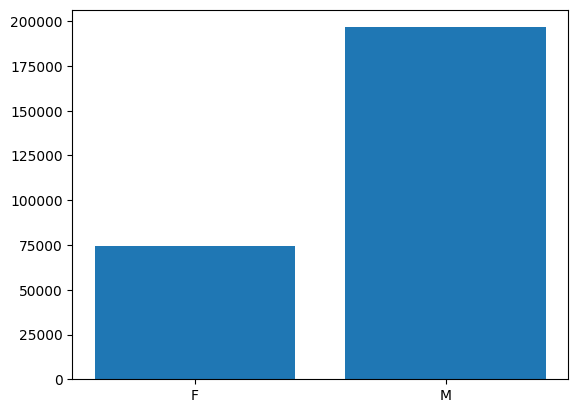

In [8]:
import matplotlib.pyplot as plt

# Könsfördelning 

sex = df2.groupby(['Sex']).size()

sex_total = sex.to_dict()

plt.bar(sex_total.keys(), sex_total.values())

<BarContainer object of 10 artists>

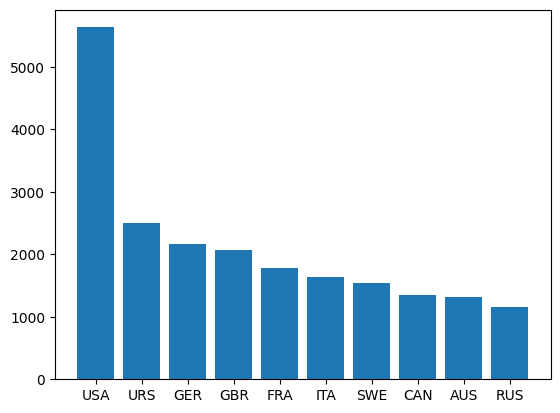

In [9]:
# h. diagram över topp 10 länder som tagit flest medaljer

medalj = df2.pivot_table(index= 'NOC', columns='Medal', aggfunc= 'size')

medalj2 = medalj.sum(axis=1)
medalj = medalj2.sort_values(ascending=False)

medalj = medalj.astype(int)
medalj.head(10)


medalj10= medalj[:10]

medalj_top_10 = medalj10.to_dict()
plt.bar(medalj_top_10.keys(), medalj_top_10.values())





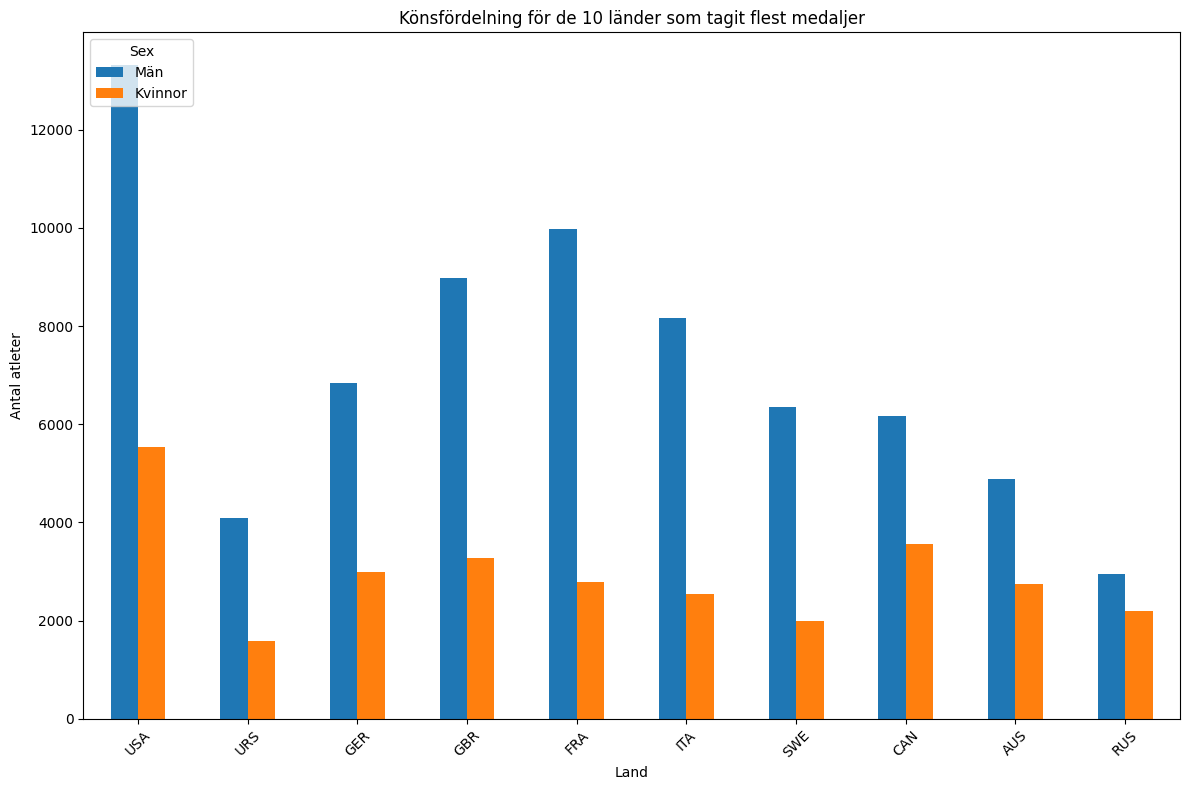

In [10]:
import matplotlib.pyplot as plt

gender_distributions = []


for country in medalj_top_10.keys():
   
    country_data = df2[df2['NOC'] == country]
    
    gender_distribution = country_data['Sex'].value_counts()
    gender_distribution = gender_distribution.reindex(['M', 'F'],)    
    gender_distributions.append(gender_distribution)


gender_df = pd.DataFrame(gender_distributions, index=medalj_top_10.keys())
gender_df.plot(kind='bar', stacked=False, figsize=(12, 8))




plt.title('Könsfördelning för de 10 länder som tagit flest medaljer')
plt.xlabel('Land')
plt.ylabel('Antal atleter')
plt.xticks(rotation=45) 
plt.legend(title='Sex', loc='upper left', labels=['Män', 'Kvinnor'])
plt.tight_layout() 
plt.show()


In [11]:
import hashlib as hl
canada_os = df2[df2["NOC"] == "CAN"]
canada_athletes = canada_os["Name"].apply(lambda x : hl.sha256(str(x).encode()).hexdigest())
canada_athletes

269       aba7d8d0992f2b3b6e46b1831df764994ff8ffbf6c898f...
270       aba7d8d0992f2b3b6e46b1831df764994ff8ffbf6c898f...
279       70df8f4a81f7f3a99f3082f342cbc5abe1a94639746d6e...
280       f88877baecbe8c235efe8ad5692bab36d2dc9e36091da0...
281       6dbe76474f9fa17f0569120a314c2fb177ec51f05996eb...
                                ...                        
270889    4addc5795374accf65ead2ca70d179d84d28730c5ac81b...
270890    4addc5795374accf65ead2ca70d179d84d28730c5ac81b...
270901    2ca90c79227f3a5bf8f1791cc94359e3ac466f5f926dd5...
271030    b2383fe9b2af798bfb60359ace2b2416cc690e725da812...
271031    b2383fe9b2af798bfb60359ace2b2416cc690e725da812...
Name: Name, Length: 9733, dtype: object

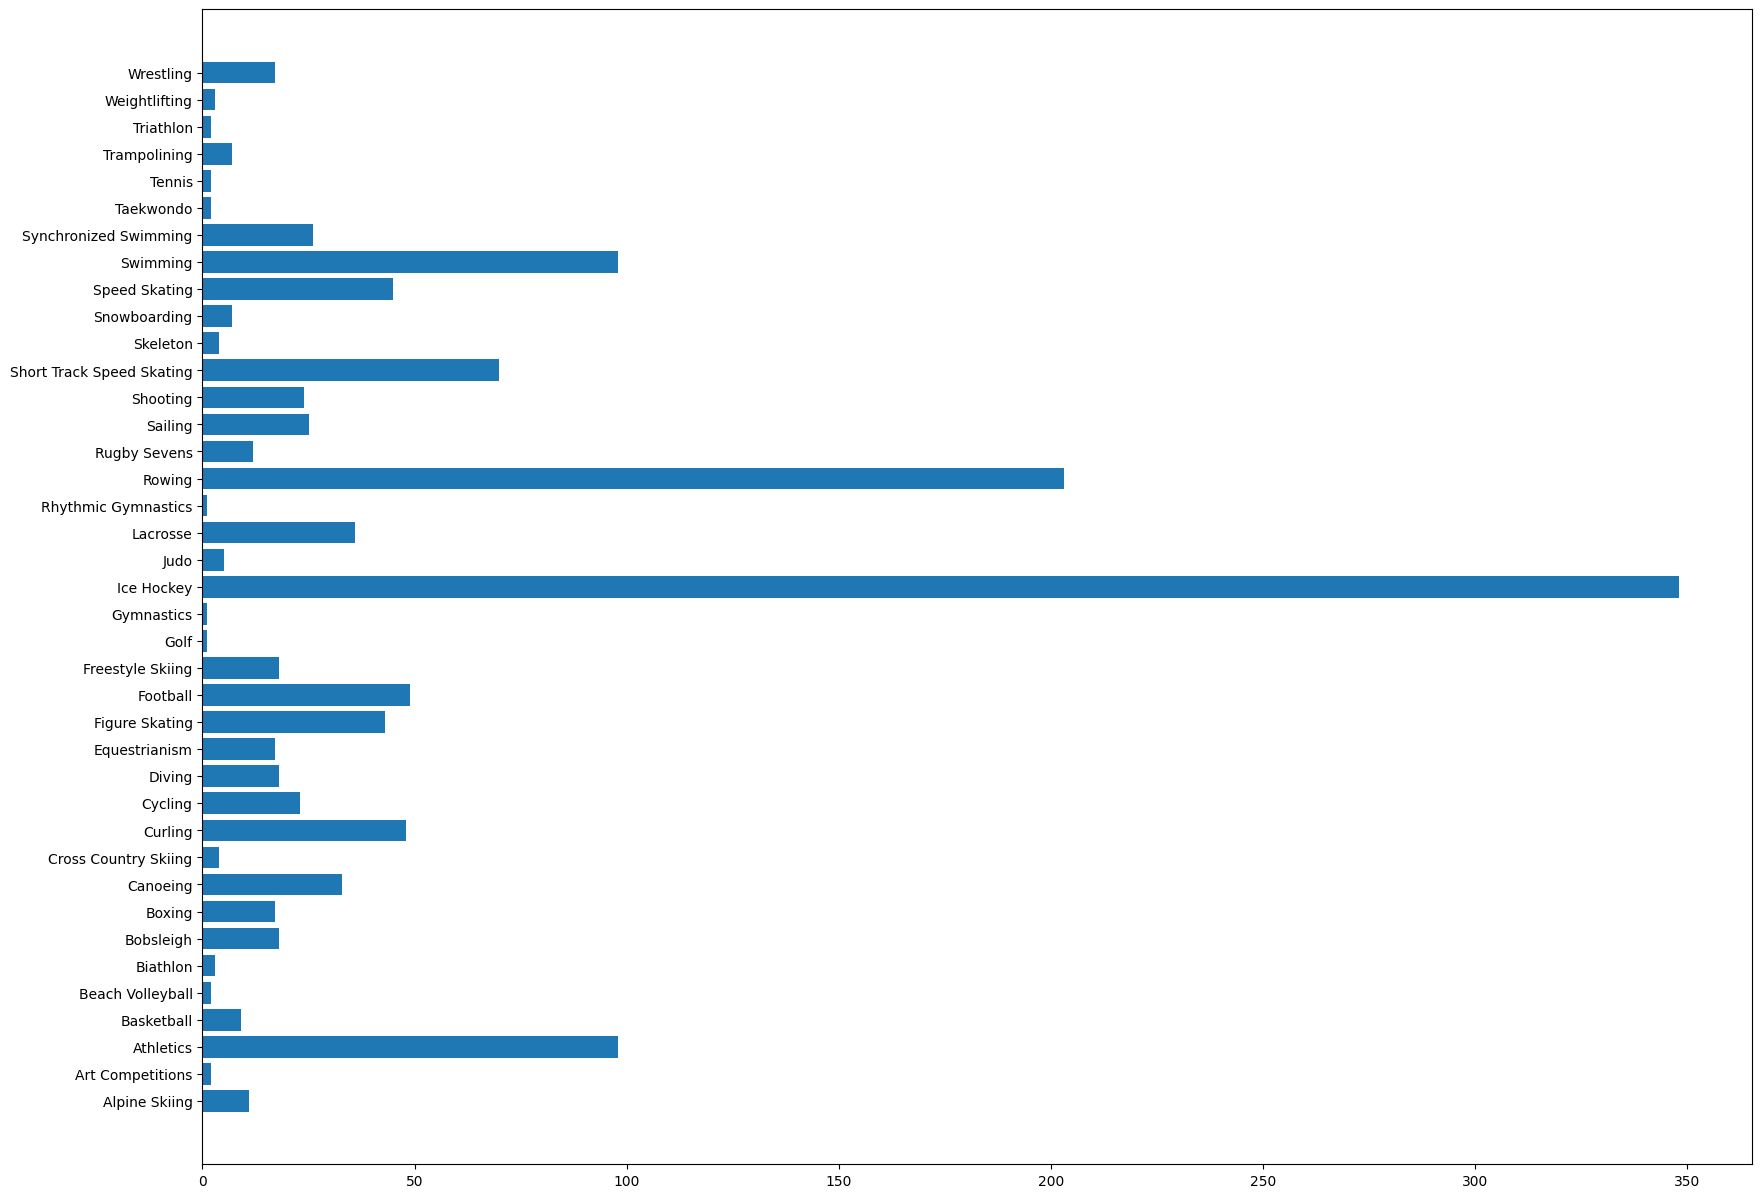

In [13]:
# Number of medals per sport. 

import matplotlib.pyplot as plt

rt = canada_os.pivot_table(index = "Sport", columns= "Medal", aggfunc= "size")
number_medal = rt.sum(axis= 1)
number_medal.sort_values(ascending= False)
tes = number_medal.astype(int)
tes_dict = tes.to_dict()

plt.figure(figsize= (20, 15))
plt.barh(list(tes_dict.keys()), tes_dict.values())
plt.show()


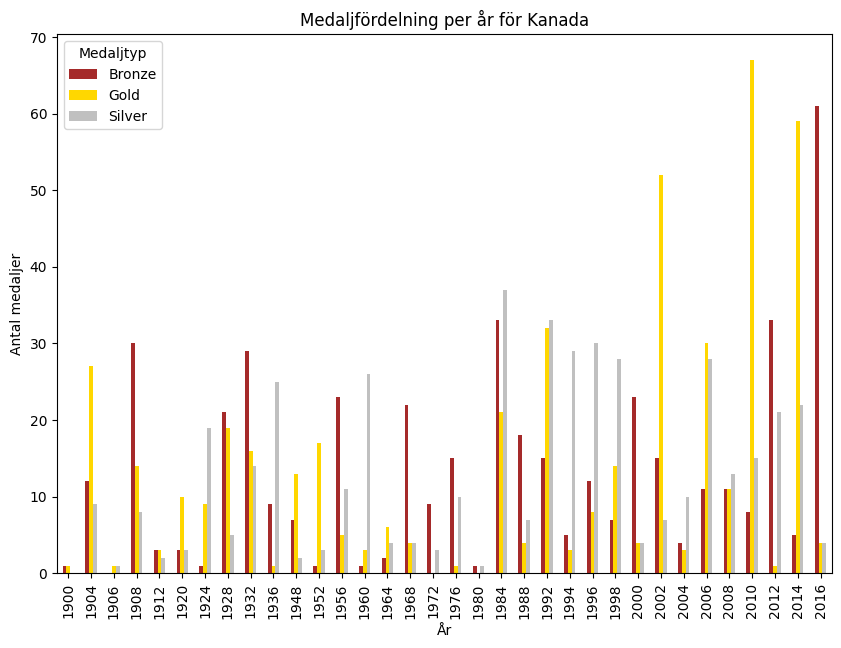

In [14]:
# Number of medals 
 
antal_medaljer = canada_os["Medal"].dropna().value_counts()
 
tabell = canada_os.pivot_table(index= 'Year', columns='Medal', aggfunc= 'size')
 
tabell.dropna()
 
 
# Stapeldiagram för medaljfördelning per år
tabell.plot(kind='bar', stacked=False, color=['brown', 'Gold', 'Silver'], figsize=(10, 7))
plt.xlabel('År')
plt.ylabel('Antal medaljer')
plt.title('Medaljfördelning per år för Kanada')
plt.legend(title='Medaljtyp')
plt.show()
 

/var/folders/1z/yqj81jcd0zb38n2307mt0p480000gn/T/ipykernel_32343/1472972834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_os.drop_duplicates(subset='ID', inplace=True)


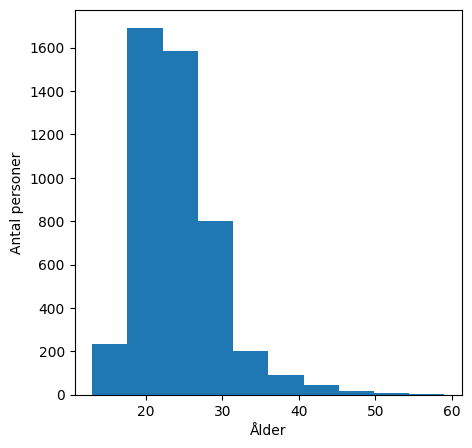

In [ ]:
# Histogram over atheletes age.
 
import numpy as np

# Remove duplicates in ID. 
 
canada_os.drop_duplicates(subset="ID", inplace=True)
 
age = canada_os["Age"]
# age.mean() - bara för att se om det stämmer, vilket gav oss medelvärdet 24år
 
 
plt.figure(figsize= (5,5))
plt.xlabel('Ålder')
plt.ylabel('Antal personer')
plt.hist(age)
plt.show()